# Data 620 - Web Analytics Project 1
Yina Qiao

video link:

For your first project, you are asked to

1. Identify and load a network dataset that has some categorical information available for each node.
2. For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
3. Compare your centrality measures across your categorical groups.
For example, using the dataset from a study of romantic relationships among high school students in Columbus, Ohio [http://researchnews.osu.edu/archive/chains.htm], you might want to determine if there are any differences in your calculated centrality measures between the two sexes. You might use a t-test or another statistical measure to support your findings.

Your project should be delivered in an Jupyter Notebook, and posted in GitHub. You and your team should created a video presentation about your project.

# *Intro*

RATING variable in a categorical manner, where RATING >= 0 is Positive and RATING < 0 is Negative

Hypothsis: hypothesis that the degree centralities of positive and negative edges in the Bitcoin OTC network are different.

It is reasonable to assume that a SOURCE user will only connect with TARGET users they trust, thus avoiding connections with untrusted TARGET users. Consequently, well-trusted TARGET users are likely to have more connections and, therefore, higher degree centrality compared to others

Data: Downloaded and stored as CSV file in Github for easy access

Stanford Network Analysis Project (SNAP)

https://snap.stanford.edu/data/soc-sign-bitcoinotc.html

# Data import and wrangling

In [15]:
import networkx as net
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter
from tabulate import tabulate
from scipy.stats import ttest_ind

# Load the dataset
url = 'https://raw.githubusercontent.com/yinaS1234/data-620/main/soc-sign-bitcoinotc.csv'
btc_otc_df = pd.read_csv(url, header=None, names=['user1', 'user2', 'weight', 'time'])
btc_otc_df = btc_otc_df.drop(columns=['time'])  # not needed for this analysis

# Create the Bitcoin OTC network
btc_otc_net = net.from_pandas_edgelist(btc_otc_df, source='user1', target='user2', edge_attr='weight')
# basic statistis
num_edges=btc_otc_net.number_of_edges()
num_nodes=btc_otc_net.number_of_nodes()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
# Draw the entire Bitcoin OTC network to save time, we will create subnetwork and visualize that
#plt.figure(figsize=(10, 6))
#net.draw(btc_otc_net, with_labels=False, node_size=10, alpha=0.3, node_color='b', edge_color='gray')
#plt.title("Bitcoin OTC Network")
#plt.show()

Number of nodes: 5881
Number of edges: 21492


# Subnetwork

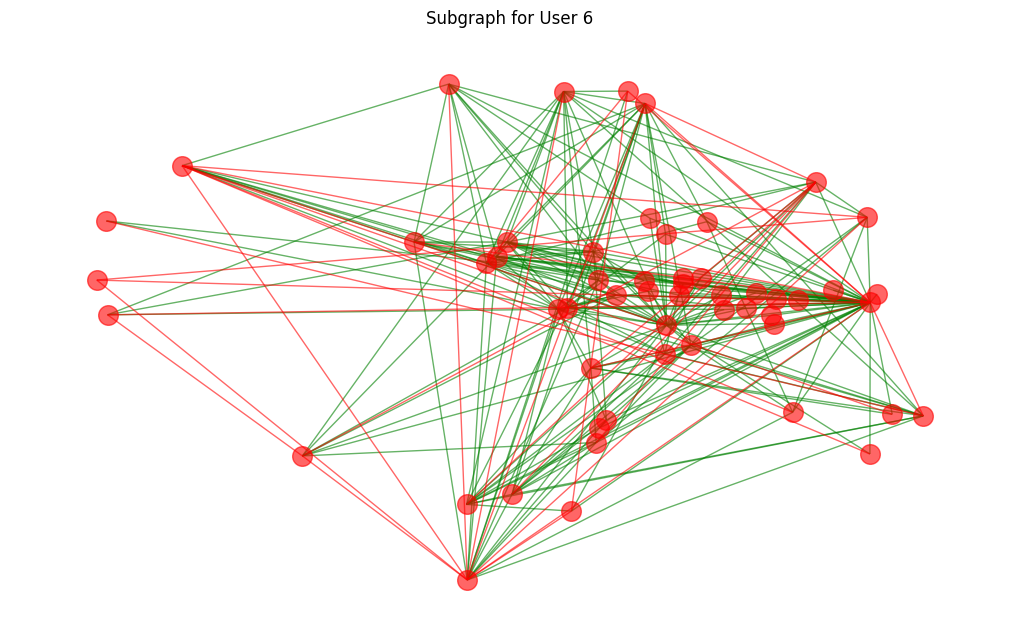

In [21]:
# Select a subgraph for user 6
user_6_nodes = [6, 2, 5, 10, 4, 32, 7, 35, 114, 77, 173, 258, 268, 219, 198, 1, 664, 937, 384, 521, 280, 687, 1386, 537, 1317, 1566, 149, 2034, 2455, 1383, 425, 1810, 2028, 1363, 1018, 1832, 1624, 550, 1331, 2642, 856, 2188, 2187, 1752, 3810, 3129, 2244, 135, 13, 2067, 61318, 4385, 2524, 3988, 1352, 96]
user_6 = btc_otc_net.subgraph(user_6_nodes)

# Draw the subgraph for user 6
plt.figure(figsize=(10, 6))
pos_edges = [(u, v) for (u, v, d) in user_6.edges(data=True) if d['weight'] >= 0]
neg_edges = [(u, v) for (u, v, d) in user_6.edges(data=True) if d['weight'] < 0]
pos = net.spring_layout(user_6)  # Calculate node positions using a spring layout algorithm

net.draw(user_6, pos=pos, with_labels=False, node_size=200, alpha=0.6, node_color='r', edge_color='g', edgelist=pos_edges)
net.draw_networkx_edges(user_6, pos=pos, edgelist=neg_edges, edge_color='r', alpha=0.6)
plt.title("Subgraph for User 6")
plt.show()

**positive edges in green and negative edges in red for the subgraph of user 6**



We see in the graph above, that for node 6 the negative (distrusted) nodes, as red lines, tend to form on the outside of the graph. This suggests that our hypothesis that untrusted nodes will have less centerality may have some merit.

# Degree Centrality

+----------+----------+
|   UserID |   Degree |
+==========+==========+
|       35 |      795 |
+----------+----------+
|     1810 |      439 |
+----------+----------+
|     2642 |      438 |
+----------+----------+
|     2125 |      436 |
+----------+----------+
|     2028 |      326 |
+----------+----------+
|      905 |      320 |
+----------+----------+
|     4172 |      293 |
+----------+----------+
|        1 |      264 |
+----------+----------+
|        7 |      239 |
+----------+----------+
|     3129 |      217 |
+----------+----------+


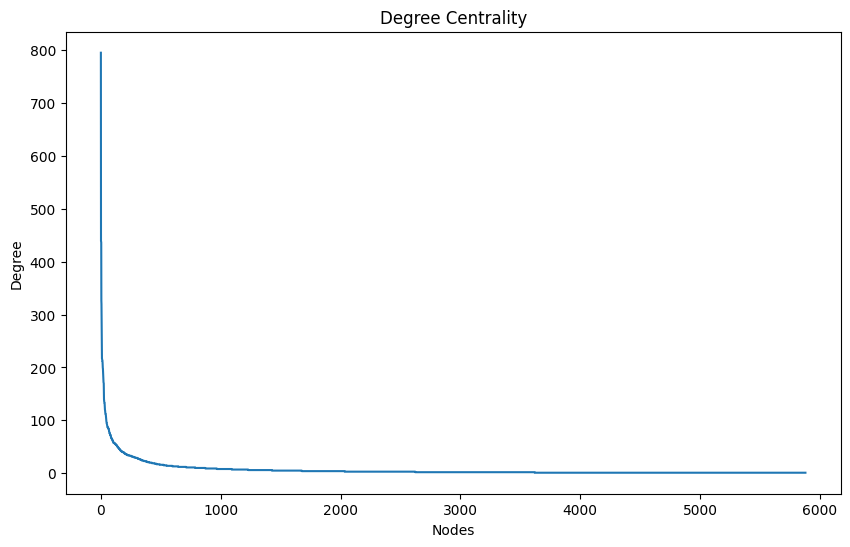

+----------+----------------+
|   UserID |   Eigen Vector |
+==========+================+
|      905 |       0.188653 |
+----------+----------------+
|     1810 |       0.182641 |
+----------+----------------+
|     2642 |       0.175077 |
+----------+----------------+
|     2028 |       0.154839 |
+----------+----------------+
|     2125 |       0.148704 |
+----------+----------------+
|       35 |       0.146066 |
+----------+----------------+
|        1 |       0.14085  |
+----------+----------------+
|     1334 |       0.135365 |
+----------+----------------+
|     4172 |       0.135335 |
+----------+----------------+
|     2388 |       0.133787 |
+----------+----------------+


In [17]:

# Calculate degree centrality
degree_centrality = net.degree(btc_otc_net)
degree_list = list(degree_centrality)
sorted_degree_list = sorted(degree_list, key=lambda tup: tup[1], reverse=True)
print(tabulate(sorted_degree_list[0:10], headers = ['UserID', 'Degree'],tablefmt='grid'))

# Degree centrality visualization
degrees = [degree for (_, degree) in sorted_degree_list]
plt.figure(figsize=(10, 6))
plt.plot(degrees)
plt.title("Degree Centrality")
plt.xlabel("Nodes")
plt.ylabel("Degree")
plt.show()

# Calculate eigenvector centrality
eigenvector_centrality = net.eigenvector_centrality(btc_otc_net)

sorted_eigen = sorted(eigenvector_centrality.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_eigen[0:10], headers = ['UserID', 'Eigen Vector'],tablefmt='grid'))

# Calculate degree centrality for positive and negative edges
positive_edges = [(u, v, d) for (u, v, d) in btc_otc_net.edges(data=True) if d['weight'] >= 0]
negative_edges = [(u, v, d) for (u, v, d) in btc_otc_net.edges(data=True) if d['weight'] < 0]
positive_degree_centrality = dict(net.degree(btc_otc_net, weight='weight'))

# Get nodes from negative_edges
negative_nodes = set()
for u, v, _ in negative_edges:
    negative_nodes.add(u)
    negative_nodes.add(v)

# Calculate negative degree centrality
negative_degree_centrality = {node: positive_degree_centrality.get(node, 0) for node in negative_nodes}



# T-Test

In [18]:
# Perform t-test
t_stat, p_value = ttest_ind(list(positive_degree_centrality.values()), list(negative_degree_centrality.values()))

# Print results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: 2.8093932655106744
P-Value: 0.004976380501412035


# Conclusion

The t-statistic and p-value obtained from the t-test provide information about the statistical significance of the difference in degree centrality between positive and negative edges in the Bitcoin OTC network.





*  The t-statistic measures the magnitude of the difference between the means of the positive and negative degree centralities relative to the variation in the data. In this case, the t-statistic value is 2.809, indicating that there is a notable difference between the means of the positive and negative degree centralities.
*   The p-value is a measure of the probability of obtaining the observed difference (or a more extreme difference) if the null hypothesis is true. In this case, the null hypothesis would be that there is no significant difference in the degree centralities of positive and negative edge.

*   The obtained p-value is 0.00498, which is less than the commonly used significance level of 0.05. Therefore, we can conclude that the difference in degree centralities between positive and negative edges is statistically significant.

The results suggest that there is strong evidence to support the hypothesis that the degree centralities of positive and negative edges in the Bitcoin OTC network are different.